# Sales Prediction

# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

# Extracting the Data

In [2]:
data = pd.read_csv(r"C:\Users\bandi\OneDrive\Documents\oasis ds intern\Task-3\Advertising.csv")

# Analysis

In [3]:
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## pairplot showing relation between Columns and target

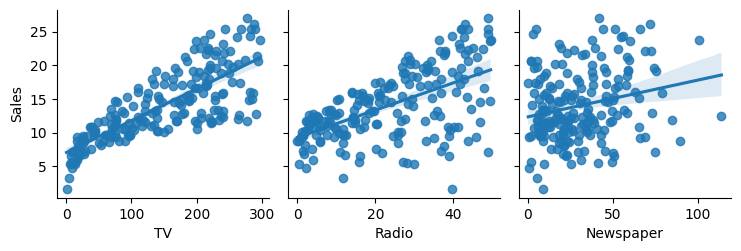

In [7]:
sns.pairplot(data=data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='reg')

## Box plot showing outliers in the data

<AxesSubplot: ylabel='Newspaper'>

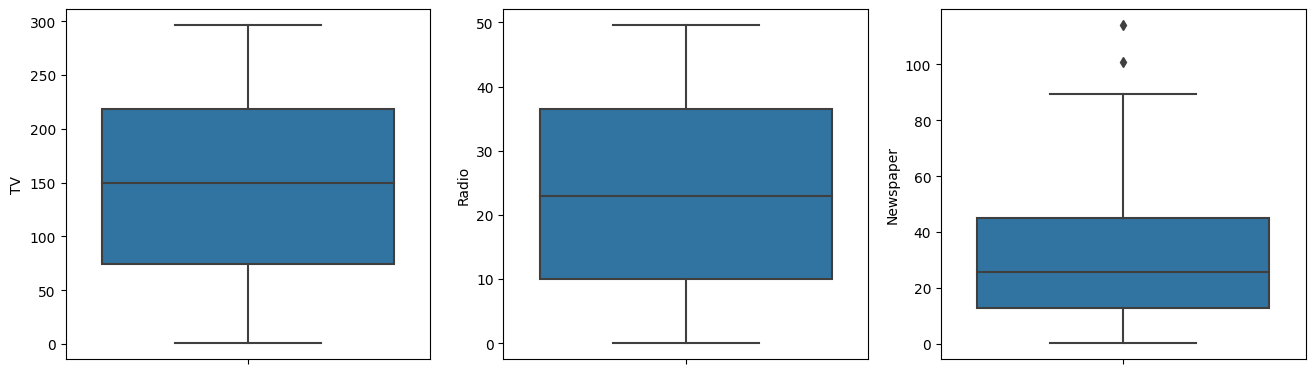

In [8]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=data, y='TV')

plt.subplot(2, 3, 2)
sns.boxplot(data=data, y='Radio')

plt.subplot(2, 3, 3)
sns.boxplot(data=data, y='Newspaper')

## Removing the Outliers

In [9]:
df = data[data['Newspaper'] <= 95]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


## Heatmap showing the Correlation between columns

<AxesSubplot: >

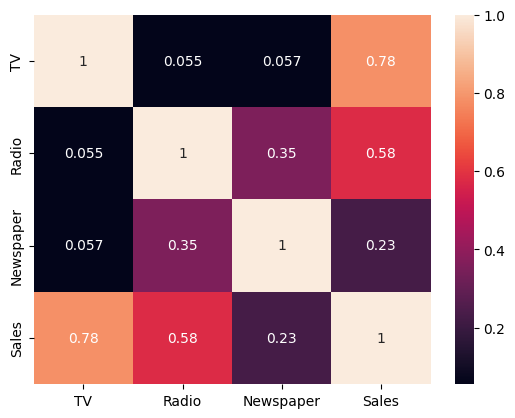

In [10]:
sns.heatmap(data=data.corr(), annot=True)

# Creating a Prediction model

In [11]:
X = df.drop('Sales', axis=1)
y = df['Sales']

## Finding the Best model 

In [12]:
parts = {
    'linear_regression':{
        'model': LinearRegression(),
        'params':{}
    },
    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            "n_estimators": range(10, 200, 10),
            "criterion":['squared_error', 'absolute_error', 'friedman_mse']
        }
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
            'max_features':['sqrt', 'log2'],
        }
    }
}

In [13]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for model_name, mp in parts.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

result = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [14]:
result.head()


,model,best_score,best_params
0,linear_regression,0.906552,{}
1,random_forest,0.981205,"{'criterion': 'absolute_error', 'n_estimators'..."
2,decision_tree,0.769021,"{'criterion': 'squared_error', 'max_features':..."


## Building the Random Forest model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Evaluating the model

In [16]:
model = RandomForestRegressor(criterion='absolute_error')

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9771628217346076

## Saving the model

In [17]:
with open('Sales_Prediction_model', 'wb') as f:
    pickle.dump(model, f)